In [1]:
# Scikit-learn Library Report
# Brief Introduction
#1. Scikit-learn is a powerful and versatile python library for maching learning, built on top of other libraries like NumPy, SciPy, and 
#   Matplotlib. It offers efficient tools for various tasks in data mining, maching learning and statistical modeling.
#2. The main usage of Scikit-learn can be categorized into the following 5 aspects:
#1)supervised learning-<1>classification: algorithms like logistic regression, support vector machines, random forests etc
#                      <2>regression: linear regression, ridge regression etc.
#2)unsupervised learning-<1>clustering：k-means, DBSCAN, Hierarchical Clustering
#                        <2>Dimensionality Reduction: principal component analysis(PCA), t-SNE
#3)model evaluation and selection: cross-validation, GridSearchCV, and metrics like accuracy, precision, recall and F1-score
#4)dara preprocessing: feature scaling(standardscaler, minmaxscaler), handling missing values, encoding categorical variables, and more
#5)Integration: seamless compatibility with Pandas, Matplotlib, and other Python libraries for data manipulation and visualization


In [2]:
# Use Iris dataset
#1. The dataset contains only 150 samples, and 4 features, so it is easy and effective to illustrate machine learning
#2. There are 3 classes(Setosa, Versicolor, Virginica), which are evenly distributed with 50 samples. Therefore, it can be easy
# to conduct classification task.
#3. The dataset is suitable for both supervised(classification) tasks and unsupervised tasks(clustering).
#4. The dataset have features such as sepal and petal dimensions, which are easy to understand and visualize.
#5. Most importantly, iris dataset is built into Scikit-learn, which can be directly loaded without additional setup.

In [3]:
# Import related libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [4]:
#load Iris dataset
iris = load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")
species_names = iris.target_names

In [5]:
#split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state = 42)

In [6]:
#Supervised Learning
#Train a random forest classifier
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(x_train, y_train)
y_predit = rf_model.predict(x_test)

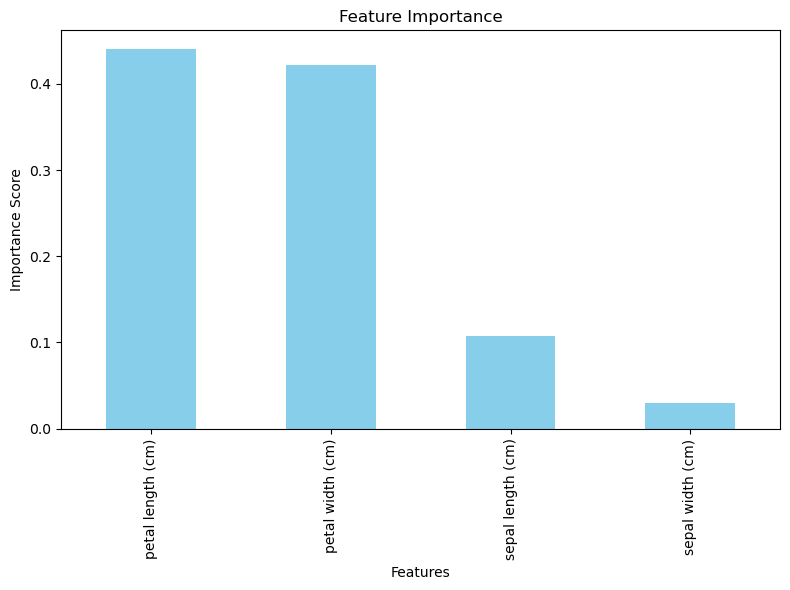

In [7]:
#Visualization 1: Feature Importance
plt.figure(figsize=(8,6))
feature_importance =pd.Series(rf_model.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', color='skyblue')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

In [8]:
#Interpretation of Bar graph 1:
#from the graph, we can notice petal length and petal width have the higher importance score(over 0.4) compared with the other two
#features(sepal length with a score of about 0.1, sepal width with a score of less than 0.05). 
#Thus, petal length and petal width are the most significant features for classification.

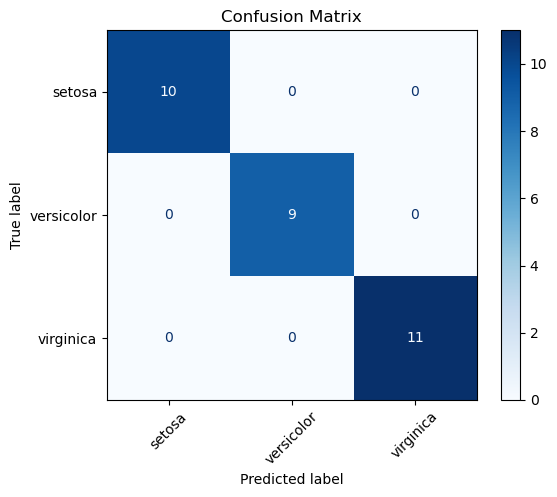

In [9]:
#Visualization2: Confusion Metrix
conf_matrix = confusion_matrix(y_test, y_predit, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=species_names)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [10]:
#Interpretation of Visualization 2:
#normally the result should not be perfect classification, that is, no misclassification.
#There reason could be
#1)the sample size is small (150 samples, 4 features), the model can easily memorize the small dataset
#2)the model may memorize the training dataset instead of learning generalized patterns

C:\study\code\learning materials\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


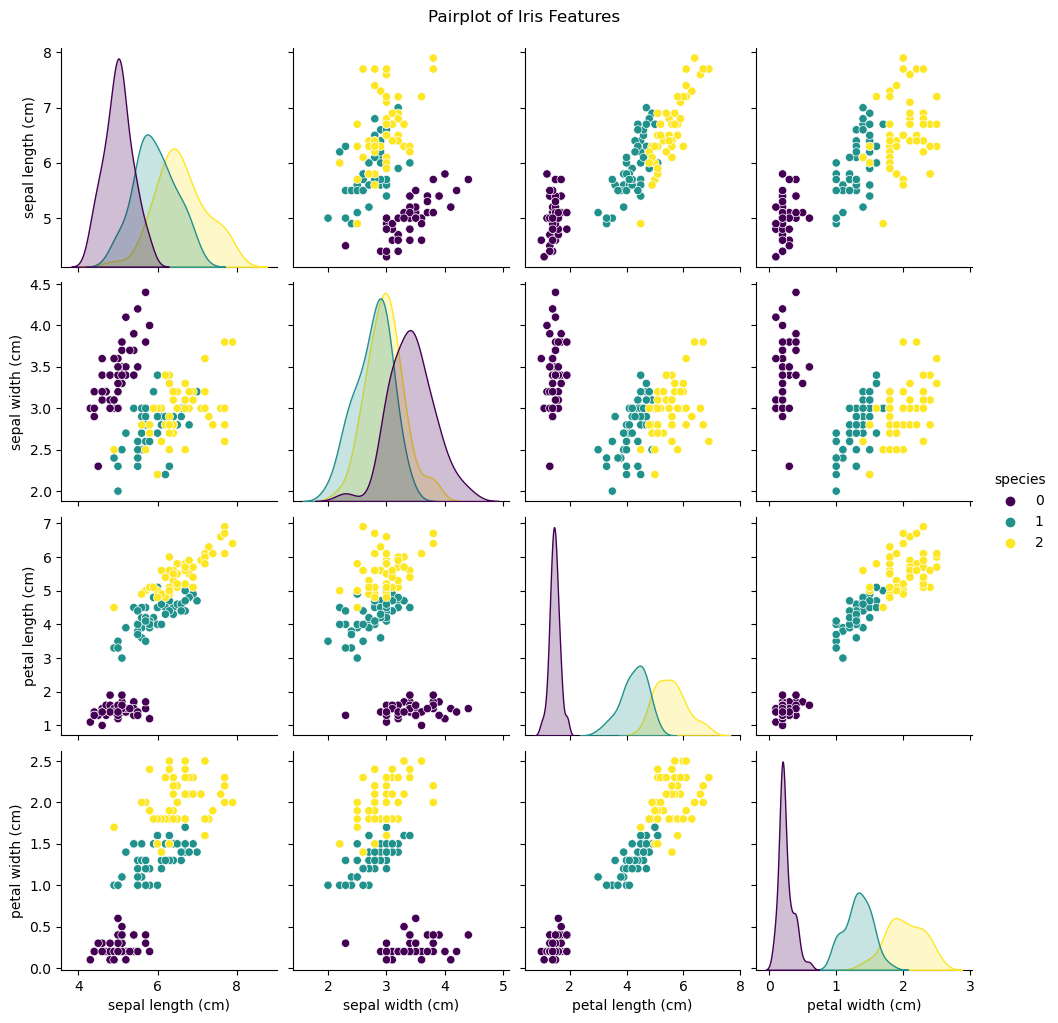

In [11]:
#Visualization3: Pairplot of features
sns.pairplot(pd.concat([x, y], axis=1), hue="species", palette="viridis", diag_kind="kde")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

In [12]:
#Interpretation of Visualization 3:
#1.from the pairplot, it is clearly seen that setosa is the most separable species in all feature combinations, versicolor and virginica
#are less distinct, particularly in Sepal Width and Sepal Length
#2.Pedal-based features are more infomrative for ditinguishing species than sepal-based features
#3.Clear separation exist between setosa and the other two classes, but versicolor and Virginica has some overlaps.

C:\study\code\learning materials\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


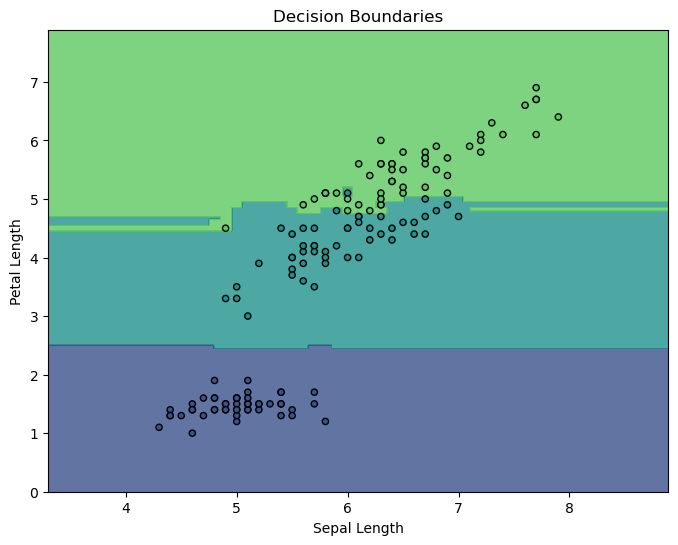

In [13]:
#Visualization 4: Decision Boundaries
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("viridis", 3).as_hex())
x_plot = x.iloc[:, [0, 2]]  # Using two features for 2D plotting, 'sepal length' and 'petal length'
# Split the dataset into training and testing sets
x_train_plot, x_test_plot, y_train_plot, y_test_plot = train_test_split(x_plot, y, test_size=0.2, random_state=42)

# Initialize and fit the random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_plot, y_train_plot)

# Set up the grid for plotting
x_min, x_max = x_plot.iloc[:, 0].min() - 1, x_plot.iloc[:, 0].max() + 1
y_min, y_max = x_plot.iloc[:, 1].min() - 1, x_plot.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict using the model
Z = rf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
plt.scatter(x_plot.iloc[:, 0], x_plot.iloc[:, 1], c=y, edgecolor='k', s=20, cmap=cmap)
plt.title("Decision Boundaries")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.show()

In [14]:
#Interpretation of Visualization4:
#from the decision boundaries, we can clearly see the randam Forest Classifier trained to classify the Iris dataset based on
#"Sepal length" and "Petal Length" works pretty well. Setosa(blue), Versicolor(green) and Virginica(teal) are generally easy to be 
#separated from one another, and very few ambiguities about separation exists.

In [15]:
#Unsupervised learning
#apply Kmeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
x['cluster'] = kmeans.fit_predict(x)


C:\study\code\learning materials\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\study\code\learning materials\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


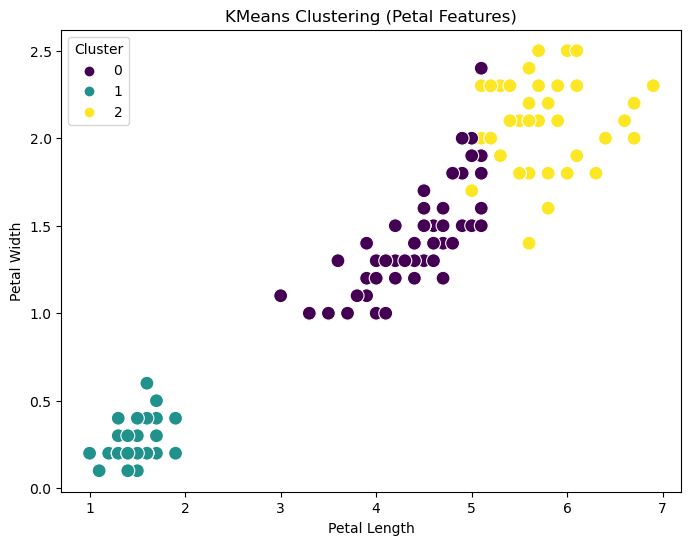

In [16]:
# Visualization 1: Clustering in Original Feature Space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x.iloc[:, 2], y=x.iloc[:, 3], hue=x['cluster'], palette='viridis', s=100)
plt.title("KMeans Clustering (Petal Features)")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(title="Cluster", loc='upper left')
plt.show()

In [17]:
# Interpretation of visualization1: 
# 1)Clusters align roughly with actual species, though some overlap exists.
# 2)cluster 1(green-Setosa) has shorter petal length and width, which makes it easily separably from the other two classes
# 3)cluster 2(orange-Versicolor) has medium-sized petal length and width and cluster 0(purple-Virginica) has the longest petal dimensions
# cluster 2 and 3 have some overlaps, but generally separable

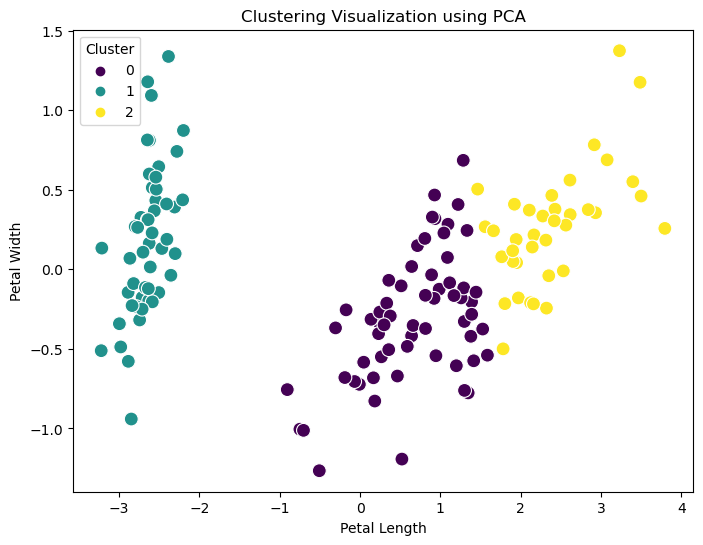

In [18]:
# Visualization 2: PCA Transformation
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x.iloc[:, :-1])
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=x['cluster'], palette='viridis', s=100)
plt.title("Clustering Visualization using PCA")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(title="Cluster", loc='best')
plt.show()

In [19]:
#Interpretation of Visualization2:
#1)the separation in the PCA suggests that KMeans has successfully grouped the data points into clusters based on their similarities
#2)the clarity of Cluster1 and the partial overlap between cluster 0 and 2 suggests: cluster1 likely represents a species
#  that is distinct in its petal dimensions
#  cluster 0 and cluster 2 represent species that has potential overlapping characteristics.
#In general, PCA visualization can confirm the clustering results by showing how well the clusters are separated in a reduced-dimension
# space

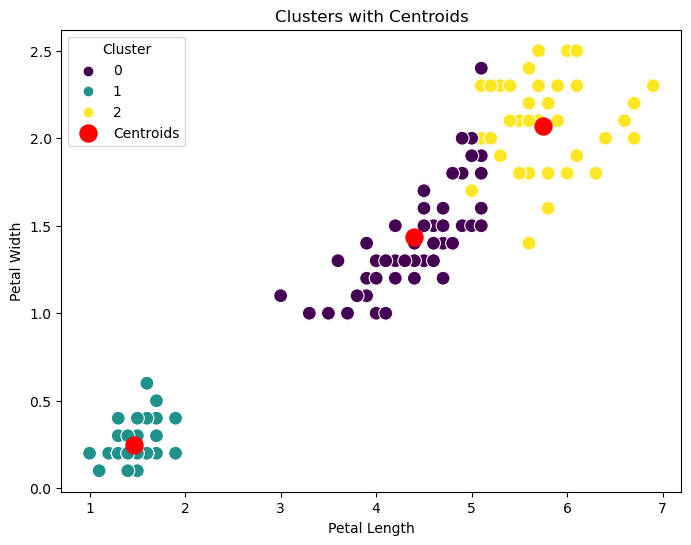

In [20]:
# Visualization 3: Cluster Centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x.iloc[:, 2], y=x.iloc[:, 3], hue=x['cluster'], palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], c='red', label='Centroids', s=150)
plt.title("Clusters with Centroids")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(title="Cluster", loc='upper left')
plt.show()

In [21]:
#Interpretation of Visualization3:
#1)the visualization shows the Kmeans algorithm has grouped the data into three distinct clusters based on their petal dimensions
#2)the centroid positions align well with the cluster distributions, which suggests that Kmeans clustering algorithm performed
# well in finding patterns within the data
#3)the visualization reveals cluster 1 has good intra-cluster similarity
#4)By contrast, cluster 0 and cluster 2 are generally well-separated except form some minor overlaps. 
#5)cluster1 is distinctly isolated in the bottom-left corner, indicating strong differences from the other two clusters.

C:\study\code\learning materials\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\study\code\learning materials\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\study\code\learning materials\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\study\code\learning materials\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on 

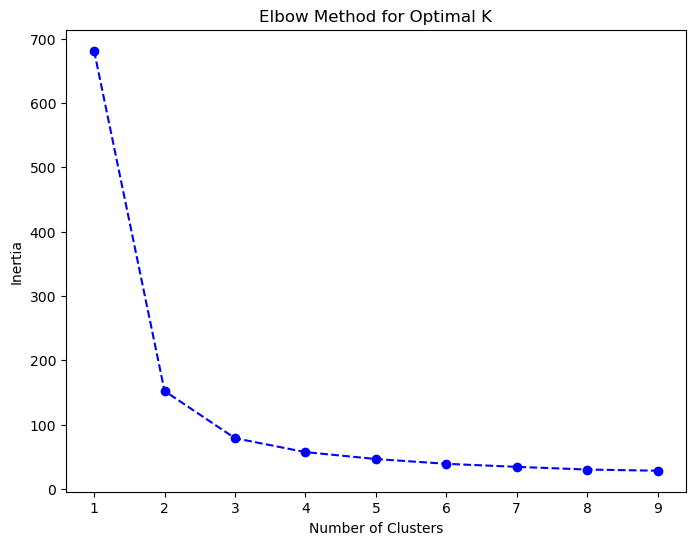

In [22]:
# Visualization 4: Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x.iloc[:, :-1])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--', color='blue')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [23]:
#Interpretation of Visualization4:
#the elbow of the group is the point where the rate of decrease in inertia significantly slows, resembling an elbow.
#1)In this graph, the elbow is likely at k=3, this suggests dividing the data into 3 clusters is optimal, balancing compactness
#(low inertia) and simplicity(fewer clusters)
#2)the reason why k=3 is the optimal is that when we add more clusters beyond 3, inertia does not reduce significantly, which
# means increasing k unnecessarily complicates the model without substantial improvement in clustering quality.